In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("phase1-results.csv", index_col="Experiment")
experiments = [
    "Base",
    "Filtered",
    "Augm0",
    "Augm1",
    "Augm2",
    "Augm3",
    "Augm4",
    "Augm5",
    "Rebalance1",
    "Rebalance2",
    "Background",
    "Final",
]
df = df.loc[experiments, :]


def numerical(s: pd.Series):
    return pd.to_numeric(s, errors="coerce").fillna(0)

In [3]:
df.head()

,val_avgfoldacc,val_mIOU,val_pacc,val_f1,test_mIOU,test_pacc,test_f1
Experiment,,,,,,,
Base,0.95796,0.22590,0.43696,0.29082,0.16984,0.41380,0.22780
Filtered,0.97892,0.23250,0.45286,0.29570,0.17258,0.40682,0.23034
Augm0,0.97130,0.26904,0.48854,0.34120,0.21766,0.43482,0.29114
Augm1,0.96800,0.26274,0.48152,0.33234,0.20854,0.43124,0.27938
Augm2,0.96534,0.27326,0.49396,0.34464,0.21272,0.44422,0.28346


Text(0.5, 0, 'Experiment')

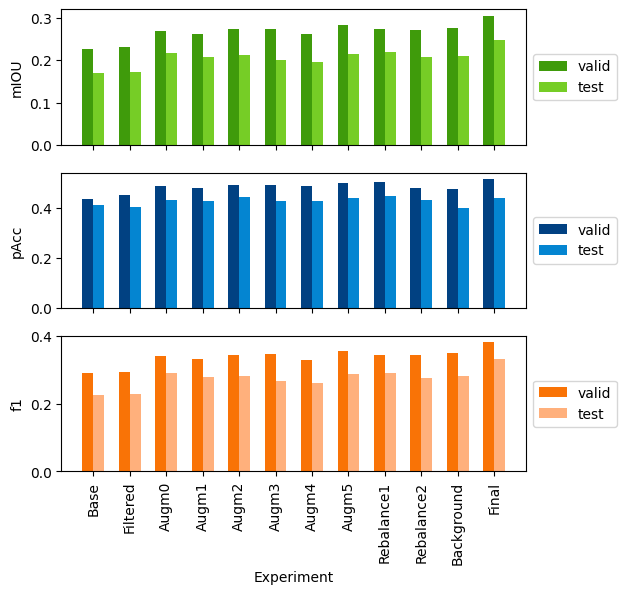

In [4]:
bar_width = 0.3
labels = df.index.values.tolist()

fig, axs = plt.subplots(nrows=3, sharex=True, figsize=(6,6))
x1 = np.arange(len(labels))
x2 = x1 + bar_width

axs[0].bar(x1, numerical(df.val_mIOU), width=bar_width, color="xkcd:grass green", label="valid")
axs[0].bar(x2, numerical(df.test_mIOU), width=bar_width, color="xkcd:apple green", label="test")
axs[0].set_ylabel("mIOU")
axs[0].legend(loc="center left", bbox_to_anchor=(1, 0.5))

axs[1].bar(x1, numerical(df.val_pacc), width=bar_width, color="xkcd:darkish blue", label="valid")
axs[1].bar(x2, numerical(df.test_pacc), width=bar_width, color="xkcd:cerulean", label="test")
axs[1].set_ylabel("pAcc")
axs[1].legend(loc="center left", bbox_to_anchor=(1, 0.5))

axs[2].bar(x1, numerical(df.val_f1), width=bar_width, color="xkcd:orange", label="valid")
axs[2].bar(x2, numerical(df.test_f1), width=bar_width, color="xkcd:peach", label="test")
axs[2].set_ylabel("f1")
axs[2].legend(loc="center left", bbox_to_anchor=(1, 0.5))

axs[2].set_xticks(x1+(bar_width/2), labels, rotation=90)
axs[2].set_xlabel("Experiment")



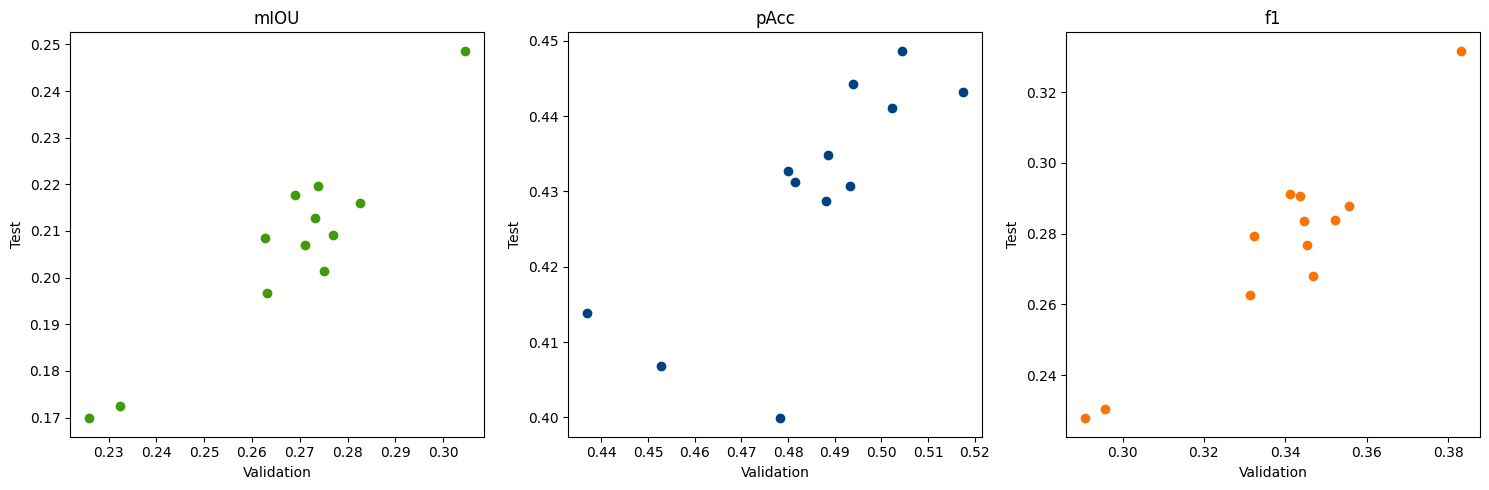

In [5]:
fig, axs = plt.subplots(ncols=3, figsize=(15,5))

axs[0].scatter(numerical(df.val_mIOU), numerical(df.test_mIOU), color="xkcd:grass green")
axs[0].set_xlabel("Validation")
axs[0].set_ylabel("Test")
axs[0].set_title("mIOU")

axs[1].scatter(numerical(df.val_pacc), numerical(df.test_pacc), color="xkcd:darkish blue")
axs[1].set_xlabel("Validation")
axs[1].set_ylabel("Test")
axs[1].set_title("pAcc")

axs[2].scatter(numerical(df.val_f1), numerical(df.test_f1), color="xkcd:orange")
axs[2].set_xlabel("Validation")
axs[2].set_ylabel("Test")
axs[2].set_title("f1")

fig.tight_layout()
